# Proyek Analisis Data: Nama dataset
- Nama: Muhammad Riszky Wibowo
- Email: bowolime@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- 5 Kota dengan penjualan terbanyak?
- Produk apa yang paling banyak peminatnya di kota Sao Paulo?
- 

## Menyaipkan semua library yang dibuthkan

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [44]:
customer_df = pd.read_csv("customers_dataset.csv")

In [45]:
data_order_df = pd.read_csv("orders_dataset.csv")

In [46]:
order_item_df = pd.read_csv("order_items_dataset.csv")

In [47]:
product_df = pd.read_csv("products_dataset.csv")

In [48]:
rating_product = pd.read_csv("order_reviews_dataset.csv")

In [49]:
data_customer_df = pd.merge(
    left=customer_df,
    right=data_order_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)

In [50]:
data_product_customer = pd.merge(
    left=data_customer_df,
    right=order_item_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

In [51]:
all_data = pd.merge(
    left=data_product_customer,
    right=product_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

### Assessing Data

In [52]:
all_data.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
dtype: int64

In [ ]:
#melakukan pengecekan terhadap duplikasi data
print("Jumlah duplikasi: ",all_data.duplicated().sum())

In [53]:
#membersihkan data
all_data.drop_duplicates(inplace=True)

In [54]:
#melakukan pengecekan terhadap duplikasi data
print("Jumlah duplikasi: ",all_data.duplicated().sum())

Jumlah duplikasi:  0


In [56]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112650 non-null  object 
 1   customer_unique_id             112650 non-null  object 
 2   customer_zip_code_prefix       112650 non-null  int64  
 3   customer_city                  112650 non-null  object 
 4   customer_state                 112650 non-null  object 
 5   order_id                       112650 non-null  object 
 6   order_status                   112650 non-null  object 
 7   order_purchase_timestamp       112650 non-null  object 
 8   order_approved_at              112635 non-null  object 
 9   order_delivered_carrier_date   111456 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  112650 non-null  object 
 12  order_item_id                 

In [57]:
all_data.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650,112650,112650.000000,112650,112650,112650,112650,112650,112635,111456,...,112650.000000,112650.000000,111047,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
unique,98666,95420,NaN,4110,27,98666,7,98112,90174,81017,...,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,fc3d1daec319d62d49bfb5e1f83123e9,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2018-02-24 03:20:27,2018-05-09 15:48:00,...,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,24,NaN,17808,47449,21,110197,21,23,48,...,NaN,NaN,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,35119.309090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.653739,19.990320,NaN,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,NaN,NaN,29866.120801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,183.633928,15.806405,NaN,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,24340.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.990000,16.260000,NaN,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,59028.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134.900000,21.150000,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000


In [58]:
print(all_data.isna().sum())

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
dtype: int64

### Cleaning Data

In [59]:
#menghilangakan data missing value
all_data.fillna(value="NaN", inplace=True)

In [61]:
#mengubah tyoe data dari object menjadi date time
datetime_columns = ["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
 
for column in datetime_columns:
  all_data[column] = pd.to_datetime(all_data[column])

In [62]:
#Melakukan pengecekan missing value pada data
print(all_data.isna().sum())

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
dtype: int64

In [63]:
#Menghilangkan missing value menggunakan metode fillna
all_data.fillna(value="/n", inplace=True)

In [64]:
#mengecek kemungkinan masih adanya missing value
print(all_data.isna().sum())

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore ...

In [65]:
#Memembuat table order id dan sales
all_data.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "price": "mean"
})


,order_id,price
product_category_name,,
NaN,1451,111.999551
agro_industria_e_comercio,182,342.124858
alimentos,450,57.634137
alimentos_bebidas,227,54.602446
artes,202,115.802105
...,...,...
sinalizacao_e_seguranca,140,108.086583
tablets_impressao_imagem,79,90.703735
telefonia,4199,71.213978


In [66]:
print(all_data['product_category_name'].unique())

['moveis_escritorio' 'utilidades_domesticas' 'casa_conforto'
 'esporte_lazer' 'informatica_acessorios' 'NaN' 'brinquedos'
 'moveis_decoracao' 'automotivo' 'climatizacao' 'telefonia' 'beleza_saude'
 'ferramentas_jardim' 'pet_shop' 'cama_mesa_banho' 'bebes'
 'relogios_presentes' 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'perfumaria' 'artes' 'papelaria' 'fashion_roupa_feminina'
 'consoles_games' 'construcao_ferramentas_iluminacao' 'alimentos_bebidas'
 'bebidas' 'cool_stuff' 'fashion_bolsas_e_acessorios' 'casa_construcao'
 'malas_acessorios' 'eletronicos' 'eletrodomesticos_2'
 'fashion_roupa_masculina' 'eletroportateis' 'portateis_casa_forno_e_cafe'
 'livros_interesse_geral' 'eletrodomesticos'
 'construcao_ferramentas_ferramentas' 'sinalizacao_e_seguranca'
 'instrumentos_musicais' 'construcao_ferramentas_construcao' 'musica'
 'fashion_calcados' 'industria_comercio_e_negocios'
 'fashion_underwear_e_moda_praia' 'dvds_blu_ray'
 'construcao_ferramentas_seguranca' 'alimentos' 'telefonia

In [67]:
all_data.groupby(by=["customer_city", "product_category_name"]).agg({
    "price": "sum"
})

price
customer_city       product_category_name         
abadia dos dourados cool_stuff              199.00
                    esporte_lazer           120.00
                    livros_interesse_geral   39.90
abadiania           eletroportateis         949.99
abaete              NaN                      36.90
...                                            ...
ze doca             esporte_lazer           149.90
                    ferramentas_jardim       39.90
                    instrumentos_musicais   359.00
zortea              NaN                      29.90
                    informatica_acessorios   69.90

[25723 rows x 1 columns]

In [68]:
all_data.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "price": "sum"
})


,order_id,price
product_category_name,,
NaN,1451,179535.28
agro_industria_e_comercio,182,72530.47
alimentos,450,29393.41
alimentos_bebidas,227,15179.48
artes,202,24202.64
...,...,...
sinalizacao_e_seguranca,140,21509.23
tablets_impressao_imagem,79,7528.41
telefonia,4199,323667.53


In [69]:
city_sales = all_data.groupby('customer_city')['price'].sum()

top_cities = city_sales.nlargest(5)
top_cities.head()

print(top_cities)

customer_city
sao paulo         1914924.54
rio de janeiro     992538.86
belo horizonte     355611.13
brasilia           301920.25
curitiba           211738.06
Name: price, dtype: float64


In [70]:
# Membuat codingan untuk menampilkan 5 kota yang memiliki sales terbanyak
selected_cities = ['sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia', 'curitiba']
filtered_data = all_data[all_data['customer_city'].isin(selected_cities)]
total_prices = filtered_data.groupby('customer_city')['price'].sum().reset_index()

# Menampilkan hasil
print(total_prices)

    customer_city       price
0  belo horizonte   355611.13
1        brasilia   301920.25
2        curitiba   211738.06
3  rio de janeiro   992538.86
4       sao paulo  1914924.54


In [71]:
top_products = filtered_data.groupby('product_category_name').size().reset_index(name='total_sold')

# Mengurutkan berdasarkan total terjual secara descending
top_products = top_products.sort_values(by='total_sold', ascending=False)

# Mengambil top 5 produk
top5_products = top_products.head(5)

# Menampilkan hasil
print(top5_products)

     product_category_name  total_sold
14         cama_mesa_banho        3539
12            beleza_saude        2983
33           esporte_lazer        2578
55        moveis_decoracao        2432
45  informatica_acessorios        2329
73   utilidades_domesticas        2319
67      relogios_presentes        1701
13              brinquedos        1331
71               telefonia        1094
41      ferramentas_jardim        1020


In [72]:
sao_paulo_data = filtered_data[filtered_data['customer_city'] == 'sao paulo']

# Hitung total penjualan untuk setiap kategori produk di São Paulo
category_sales = sao_paulo_data.groupby('product_category_name')['price'].sum()

# Pilih 5 kategori teratas
top_categories = category_sales.nlargest(5)

# Tampilkan hasilnya
print("Top 5 Kategori Produk yang Terjual di São Paulo:")
print(top_categories)

Top 5 Kategori Produk yang Terjual di São Paulo:
product_category_name
beleza_saude              189361.87
cama_mesa_banho           170705.41
relogios_presentes        165897.46
informatica_acessorios    144635.68
esporte_lazer             144533.26
Name: price, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1: 5 kota yang memiliki penjualan terbaik di mana saja

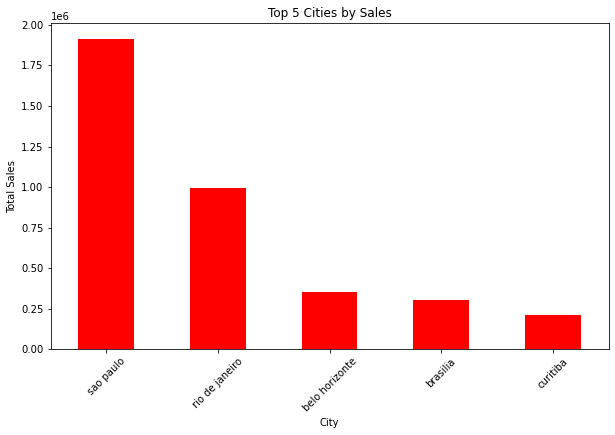

In [73]:
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='red')
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: apa saja product yang paling banyak terjual di kota yang memiliki penjualan terbanyak

In [74]:
sao_paulo_data = filtered_data[filtered_data['customer_city'] == 'sao paulo']

# Hitung total penjualan untuk setiap kategori produk di Sao Paulo
category_sales = sao_paulo_data.groupby('product_category_name')['price'].sum()

# Pilih 5 kategori teratas
top_categories = category_sales.nlargest(5)

Top 5 Kategori Produk yang Terjual di São Paulo:
product_category_name
beleza_saude              189361.87
cama_mesa_banho           170705.41
relogios_presentes        165897.46
informatica_acessorios    144635.68
esporte_lazer             144533.26
Name: price, dtype: float64


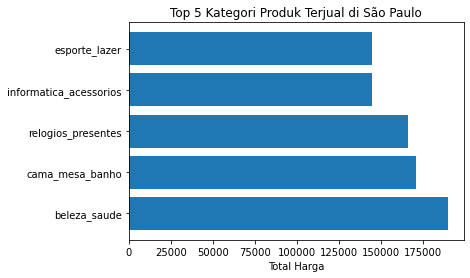

In [75]:


# Menampilkan hasil dari 5 kategori produk teratas di Sao Paulo
print("Top 5 Kategori Produk yang Terjual di Sao Paulo:")
print(top_categories)

# Tampilkan grafik bar horizontal
plt.barh(y=top_categories.index, width=top_categories.values)
plt.xlabel("Total Harga")
plt.title("Top 5 Kategori Produk Terjual di Sao Paulo")
plt.show()

In [76]:
bottom_products = sao_paulo_data.sort_values(by='price').head(5)

## Conclusion

- Conclution pertanyaan 1 : 5 kota dengan penjualan terbaik kota "Sao Paulo", "Rio De Jeneiro", "Belo Horizonte", "Brasilia", dan "Curitiba"
- conclution pertanyaan 2 : Produk dengan 5 Penjualan terbaik di kota Sau Paulo adalah : "Beleza Saude", "Cama Mesa Banho", "Relogios_presentes", "Informatica_acessorios", "esporte_ezer"

STREAMLIT 


In [77]:
st.title('Muhammad Riszky Wibowo')
col1, col2= st.columns(2)
 
with col1:
    st.header("5 Kategori Sales Terbanyak di Kota Sao Paulo")
    st.bar_chart(top_categories)
 
with col2:
    st.header("5 Kota dengan Sales Terbanyak")
    st.bar_chart(top_cities)